In [53]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import yaml

from examples.constraints.context.context_evaluator import ContextEvaluator
from examples.constraints.context.utils import Experimenter
from presp.prescriptor import NNPrescriptor, NNPrescriptorFactory

In [50]:
RESULTS_DIR = Path("examples/constraints/context/longer")
with open(RESULTS_DIR / "config.yml", "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)
# GENS = config["evolution_params"]["n_generations"]
GENS = len(list(RESULTS_DIR.glob("*.csv")))
print(GENS)

experimenter = Experimenter(RESULTS_DIR)

config

1000


{'eval_params': {'device': 'mps', 'n_jobs': 1},
 'evolution_params': {'mutation_factor': 0.1,
  'mutation_rate': 0.1,
  'n_elites': 0,
  'n_generations': 1000,
  'population_size': 200,
  'remove_population_pct': 0,
  'save_path': 'examples/constraints/context/longer'},
 'prescriptor_params': {'device': 'mps',
  'model_params': [{'in_features': 1, 'out_features': 16, 'type': 'linear'},
   {'type': 'tanh'},
   {'in_features': 16, 'out_features': 16, 'type': 'linear'},
   {'type': 'tanh'},
   {'in_features': 16, 'out_features': 2, 'type': 'linear'}]}}

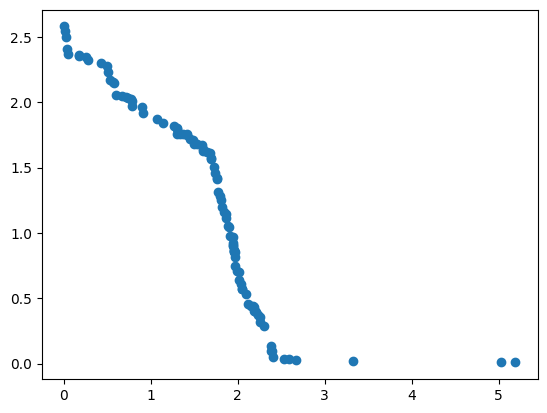

In [52]:
def plot_pareto():
    pareto_df = experimenter.get_gen_df(GENS)
    fig, ax = plt.subplots()
    ax.scatter(pareto_df["f1"], pareto_df["f2"])
    plt.show()

plot_pareto()

In [ ]:
def plot_solution_space(ax: plt.Axes, context_idx: int, gen: int, color_idx: int, plot_optimal: bool = True, test: bool = False):

    pareto_df = pd.read_csv(RESULTS_DIR / f"{gen}.csv")
    pareto_df = pareto_df[pareto_df["rank"] == 1]

    all_X = []
    for cand_id in pareto_df["cand_id"]:
        X = experimenter.get_candidate_solutions(cand_id, test)
        all_X.append(X[context_idx])
    all_X = np.stack(all_X)
    x1s = all_X[:, 0]
    x2s = all_X[:, 1]

    label = context_idx
    if test:
        label = f"test_{context_idx}"
    ax.scatter(x1s, x2s, label=label, color=f"C{color_idx}")

    if plot_optimal:
        optimal = experimenter.evaluator.get_optimal_actions(test=test).cpu().numpy()
        optimal_c = optimal[context_idx]
        ax.plot(optimal_c[0], optimal_c[1], color=f"C{color_idx}", linestyle="--")
    return ax

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

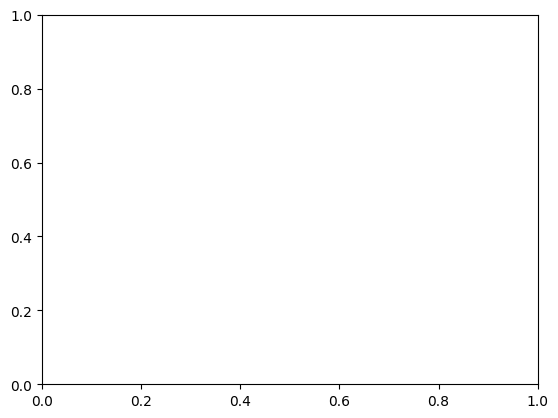

In [55]:
fig, ax = plt.subplots()
for context_idx in range(3):
    ax = plot_solution_space(ax, context_idx, GENS, context_idx, plot_optimal=True)

for context_idx in range(3):
    ax = plot_solution_space(ax, context_idx, GENS, context_idx + 3, plot_optimal=True, test=True)

ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Solution Space for Each Context")

plt.show()

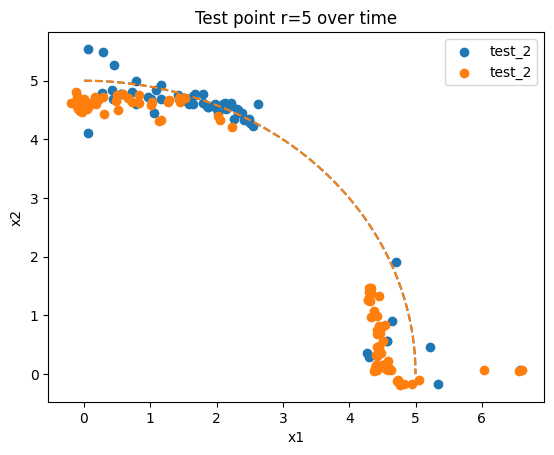

In [47]:
fig, ax = plt.subplots()
for i, gen in enumerate([150, 1000]):
    ax = plot_solution_space(ax, 2, gen, i, plot_optimal=True, test=True)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Test point r=5 over time")
ax.legend()

plt.show()